<a href="https://colab.research.google.com/github/Vaibhav-Krishna-S/Atom-projects/blob/main/MLproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Is a ML Project titled : **Heart Disease Prediction using Machine Learning with Python**  by- Vaibhav Krishna
                                    Muhammed and
                                 Azeem



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error


Data Collection and processing

In [ ]:
# loading the csv data to pandas dataframe
heart_data=pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X=heart_data[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values

In [ ]:
#print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# the number of rows and coulmns in the dataset
heart_data.shape

(303, 14)

In [ ]:
#getting some more info
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measure of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1 --> Defective Heart      
0 --> Healthy Heart

In [ ]:
# Checking the distribution of the target Varible
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Splitting the features and target

In [ ]:
x= heart_data.drop(columns='target',axis=1)
y=heart_data['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Splliting the data into training data and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,stratify= y, random_state=1)#86.91

In [ ]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,stratify= y, random_state=0) #86

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,stratify= y, random_state=3)

In [ ]:
 #x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,stratify= y, random_state=4)

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,stratify= y, random_state=5)

In [ ]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,stratify= y, random_state=6)

In [ ]:
print(x.shape,x_train.shape,x_test.shape) # to check how much data went into training and testing

(303, 13) (196, 13) (107, 13)


Training our Machine Learning Model


Logistic Regression

In [ ]:
# we will use Logistic Regression as it is useful for Binary Classification
model = LogisticRegression()

In [ ]:
# Training the LogisticRegression Model with Training Data
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation


Accuracy Score

In [ ]:
# accuracy on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy= accuracy_score(x_train_prediction,y_train)

In [ ]:
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 0.8571428571428571


In [ ]:
# accuracy on the test data
x_test_prediction= model.predict(x_test)
test_data_accuracy= accuracy_score(x_test_prediction,y_test)

In [ ]:
print("Accuracy on test data :",test_data_accuracy)

Accuracy on test data : 0.8691588785046729


Building a predective system


In [ ]:
input_data=(67,1,0,120,229,0,0,129,1,2.6,1,2,3)

# Change the input data to numpy array

input_data_as_numpy_array=np.asarray(input_data)
# reshaping the numpy array as we are only predicting for instance(predicting for one variable)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The Person doesn't have a heart disease")

else:
  print("The person has a heart disease")

[0]
The Person doesn't have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Data Visualisation**

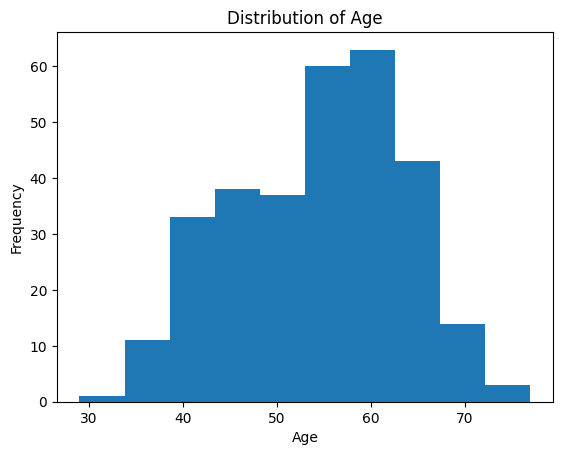

In [ ]:
# Histogram
plt.hist(heart_data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

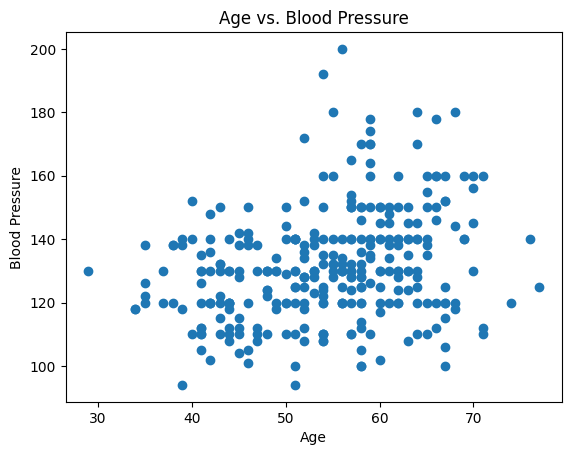

In [ ]:
# Scatter plot
plt.scatter(heart_data['age'], heart_data['trestbps'])
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs. Blood Pressure')
plt.show()

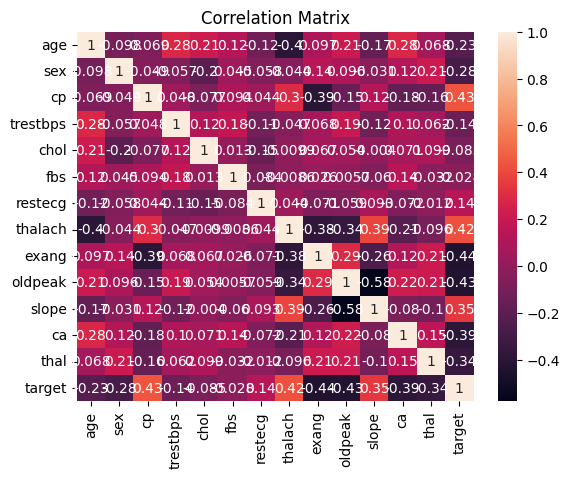

In [ ]:
# Heatmap
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y_score = model.predict_proba(X)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


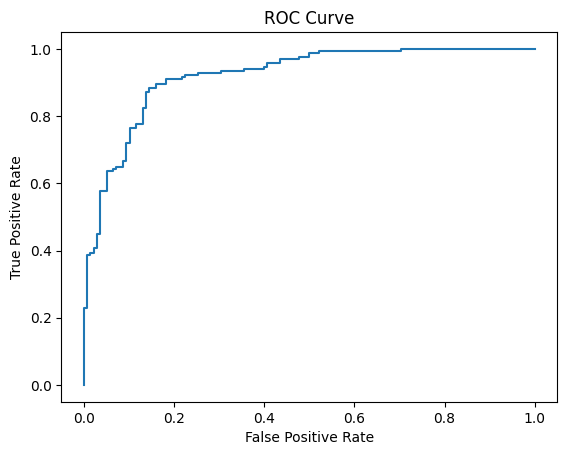

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y,y_score)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

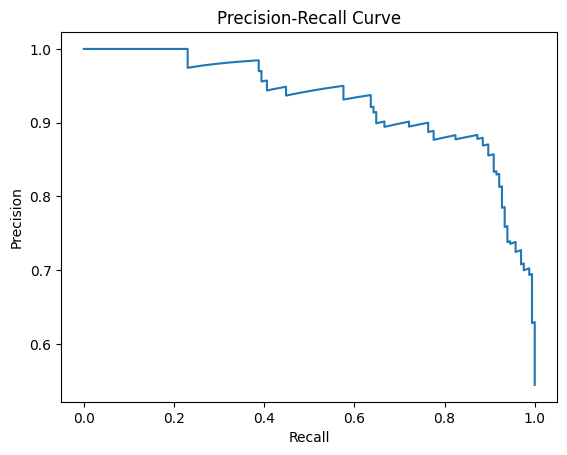

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y, y_score)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

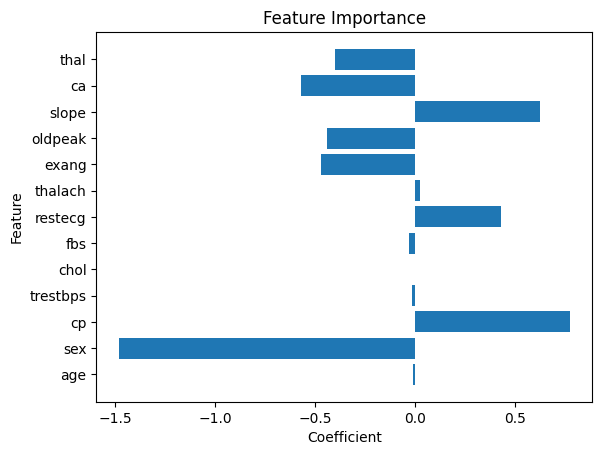

In [ ]:
# Feature importance plot
feature_importance = model.coef_[0]  # Assuming you have a fitted logistic regression model named 'model'
feature_names = heart_data.columns[:-1]  # Assuming your data has column names and the target variable is the last column
plt.barh(feature_names, feature_importance)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:


# Assuming you have the true labels stored in y_true and the predicted class labels in y_pred

# Calculate mean squared error
mse = mean_squared_error(y,y_score)

# Calculate mean absolute error
mae = mean_absolute_error(y, y_score)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.11433849310346704
Mean Absolute Error: 0.24361633248497602
